# pandas series操作

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
s1 = pd.Series([1,2,3,4,np.nan,6,7])
s1

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    6.0
6    7.0
dtype: float64

In [4]:
s1.values

array([ 1.,  2.,  3.,  4., nan,  6.,  7.])

In [5]:
s1.index

RangeIndex(start=0, stop=7, step=1)

In [6]:
s2 = pd.Series([21,23,42,21,23],index=['Jack','Lucy','Helen','Milky','Jasper'])
s2

Jack      21
Lucy      23
Helen     42
Milky     21
Jasper    23
dtype: int64

In [7]:
s2.values

array([21, 23, 42, 21, 23], dtype=int64)

In [8]:
s2.index

Index(['Jack', 'Lucy', 'Helen', 'Milky', 'Jasper'], dtype='object')

In [9]:
s2['Jack']

21

In [10]:
s2.loc['Jack']

21

In [12]:
s2.iloc[0]

21

In [14]:
print(s2.shape)
print(s2.size)

(5,)
5


In [15]:
s2.head(2)

Jack    21
Lucy    23
dtype: int64

In [16]:
s2.describe()

count     5.0
mean     26.0
std       9.0
min      21.0
25%      21.0
50%      23.0
75%      23.0
max      42.0
dtype: float64

In [17]:
s2.sort_values()

Jack      21
Milky     21
Lucy      23
Jasper    23
Helen     42
dtype: int64

In [18]:
s2[s2>22]

Lucy      23
Helen     42
Jasper    23
dtype: int64

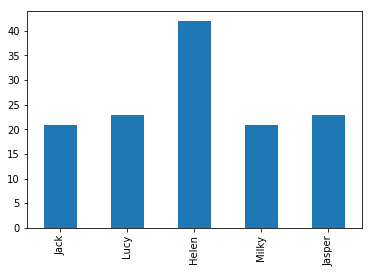

In [19]:
s2.plot.bar()

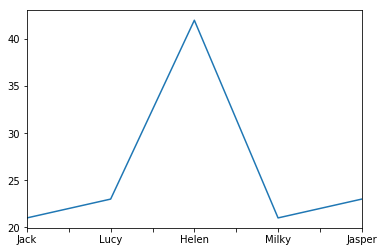

In [20]:
s2.plot.line()

In [21]:
'Lucy' in s2

True

In [22]:
s2_dict = s2.to_dict()
s2_dict

{'Helen': 42, 'Jack': 21, 'Jasper': 23, 'Lucy': 23, 'Milky': 21}

In [23]:
s2_series = pd.Series(s2_dict)
s2_series

Helen     42
Jack      21
Jasper    23
Lucy      23
Milky     21
dtype: int64

In [24]:
name = ['Jack','Lucy','Helen','Milky','Tom','Jasper','Helen']
s2_new = pd.Series(s2_dict,index=name)
s2_new


Jack      21.0
Lucy      23.0
Helen     42.0
Milky     21.0
Tom        NaN
Jasper    23.0
Helen     42.0
dtype: float64

In [25]:
s2_new.drop_duplicates()

Jack     21.0
Lucy     23.0
Helen    42.0
Tom       NaN
dtype: float64

In [26]:
pd.isnull(s2_new)

Jack      False
Lucy      False
Helen     False
Milky     False
Tom        True
Jasper    False
Helen     False
dtype: bool

# pandas DataFrame操作

In [30]:
import seaborn as sn  #画图包

In [32]:
df = pd.DataFrame({'Student_1':[90,100,95],'Student_2':[60,80,100]},index=['Monday','Wednesday','Friday'])
df

,Student_1,Student_2
Monday,90,60
Wednesday,100,80
Friday,95,100


In [33]:
df1 = pd.DataFrame([[1,2,3],[4,5,6]],index=['A','B'],columns=['C1','C2','C3'])
df1

,C1,C2,C3
A,1,2,3
B,4,5,6


In [34]:
df1.values

array([[1, 2, 3],
       [4, 5, 6]], dtype=int64)

In [35]:
df1.index

Index(['A', 'B'], dtype='object')

In [37]:
df1.columns

Index(['C1', 'C2', 'C3'], dtype='object')

In [38]:
df1.T

,A,B
C1,1,4
C2,2,5
C3,3,6


In [39]:
df1.shape

(2, 3)

In [40]:
df1.size

6

In [41]:
df1.head(1)

,C1,C2,C3
A,1,2,3


In [42]:
df1.tail(1)

,C1,C2,C3
B,4,5,6


In [43]:
df1.describe()

,C1,C2,C3
count,2.00000,2.00000,2.00000
mean,2.50000,3.50000,4.50000
std,2.12132,2.12132,2.12132
min,1.00000,2.00000,3.00000
25%,1.75000,2.75000,3.75000
50%,2.50000,3.50000,4.50000
75%,3.25000,4.25000,5.25000
max,4.00000,5.00000,6.00000


In [45]:
df1.loc['B']

C1    4
C2    5
C3    6
Name: B, dtype: int64

In [46]:
df1

,C1,C2,C3
A,1,2,3
B,4,5,6


In [47]:
df1.loc['B'].loc['C2']

5

In [54]:
df1['C2'].loc['B']

5

In [55]:
df1.loc['B','C2']

5

In [56]:
df1.iloc[1,1]

5

In [57]:
df1+10*15

,C1,C2,C3
A,151,152,153
B,154,155,156


In [61]:
df

,Student_1,Student_2
Monday,90,60
Wednesday,100,80
Friday,95,100


In [60]:
df1['C2'] = df1.apply(lambda x:x['C2']**2+10,axis=1)
df

,Student_1,Student_2
Monday,90,60
Wednesday,100,80
Friday,95,100


In [66]:
df1.assign(C2=lambda x: x['C2']**2+10,
            C3=lambda x: x['C3']*2-10) \
    .loc['A']\
    .max()

42446

In [67]:
df1

,C1,C2,C3
A,1,206,3
B,4,1235,6


# Titanic数据观察思考

In [68]:
df = pd.read_csv('train.csv') #导入数据
df.shape #看形状
df.head(5)
df.tail(5) #看前后几行数据
df.isnull().sum() # 看每列空值数
df.dtypes #看每个字段类型
df.字段名.value_counts() #字段值分组统计数
df.字段名.value_counts().plot(kind='bar') #字段值分组统计数图标展示
df.isnull.sum().plot(kind='bar')

#数据清洗
df1 = df.drop('Cabin',axis=1)  #删除列

df1['Age'] = df1['Age'].fillna(20)  #填值

df2 = df1[df1['Embarked'].notnull()]  #选择字段非空


#可整合到2步操作
df3=df.drop('Cabin',axis=1).assin(Age=lambda x: x['Age'].fillna(20))
df3 = df3.loc[df3['Embarked'].notnull()]


df1.loc[10:14,['Name','Sex','Survived']] #选取行字段

df3.columns  #看字段

df3.pivot_table(values='PassagerId',index='Survived',column='Sex',aggfunc='count')


df4 = df3.loc[df3['Survived'] ==1]  #选择数据


df['Surivived'].corr(df['Pclass'])  #求皮尔森关系    -1 表示强烈负相关   1表示强烈正相关 

FileNotFoundError: [Errno 2] File b'train.csv' does not exist: b'train.csv'

# pandas index 操作

In [70]:
s = pd.Series([1,2,3,4,5,6],index=pd.date_range('20170102',periods=6))
s

2017-01-02    1
2017-01-03    2
2017-01-04    3
2017-01-05    4
2017-01-06    5
2017-01-07    6
Freq: D, dtype: int64

In [71]:
s.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [72]:
s.index[2]

Timestamp('2017-01-04 00:00:00', freq='D')

In [73]:
s.index[2:]

DatetimeIndex(['2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07'], dtype='datetime64[ns]', freq='D')

# Series reindex操作

In [74]:
np.random.randn(1,4).tolist()

[[-0.2742832618265876,
  0.18842962968171667,
  -1.060575914883997,
  0.19894897568962022]]

In [76]:
s1=pd.Series(np.random.randn(1,4).tolist()[0],index=['A','B','C','D'])
s1

A    0.261590
B    0.947865
C    0.687997
D    0.423463
dtype: float64

In [78]:
s2 = s1.reindex(['A','B','C','D','E','F','G'])
s2

A    0.261590
B    0.947865
C    0.687997
D    0.423463
E         NaN
F         NaN
G         NaN
dtype: float64

In [80]:
s3 = s2.reindex(['A','B','C','D','E','F','G','H'],fill_value=0)
s3

A    0.261590
B    0.947865
C    0.687997
D    0.423463
E         NaN
F         NaN
G         NaN
H    0.000000
dtype: float64

# pandas reindex操作

In [81]:
df = pd.DataFrame(np.random.randn(4,4),index=['r1','r2','r3','r4'],columns=['c1','c2','c3','c4'])
df

,c1,c2,c3,c4
r1,0.440597,-0.241213,-1.631012,-0.206868
r2,0.026118,0.222846,-0.996383,0.619934
r3,-0.432984,0.820832,-0.969743,-0.891098
r4,-0.563067,0.635911,1.042380,-0.877251


In [82]:
df.reindex(['r1','r2','r3','r6','r4','r5'])

,c1,c2,c3,c4
r1,0.440597,-0.241213,-1.631012,-0.206868
r2,0.026118,0.222846,-0.996383,0.619934
r3,-0.432984,0.820832,-0.969743,-0.891098
r6,NaN,NaN,NaN,NaN
r4,-0.563067,0.635911,1.042380,-0.877251
r5,NaN,NaN,NaN,NaN


In [84]:
df.reindex(columns=['c1','c2','c3','c4','c5'])

,c1,c2,c3,c4,c5
r1,0.440597,-0.241213,-1.631012,-0.206868,NaN
r2,0.026118,0.222846,-0.996383,0.619934,NaN
r3,-0.432984,0.820832,-0.969743,-0.891098,NaN
r4,-0.563067,0.635911,1.042380,-0.877251,NaN


# 删除 series

In [85]:
s1 = pd.Series(np.arange(5),index=[1,2,3,4,5])
s1

1    0
2    1
3    2
4    3
5    4
dtype: int32

In [86]:
s1.drop(4)

1    0
2    1
3    2
5    4
dtype: int32

# 删除DataFrame

In [96]:
df = pd.DataFrame(np.random.randn(4,4),index=['r1','r2','r3','r4'],columns=['c1','c2','c3','c4'])
df

,c1,c2,c3,c4
r1,-1.511995,-0.333335,0.995616,2.393689
r2,0.213173,-0.336836,-0.357318,3.029304
r3,0.673978,0.326085,-1.309872,0.030529
r4,0.335951,-0.130731,0.447403,0.577122


In [88]:
df.drop('r1')

,c1,c2,c3,c4
r2,0.700972,-0.239889,-0.844740,0.437796
r3,1.365496,-0.730716,0.547033,-2.364533
r4,0.430905,0.314263,-0.432378,0.113574


In [95]:
df.drop('c4',axis=1)

KeyError: "['c4'] not found in axis"

In [90]:
df

,c1,c2,c3,c4
r1,0.795576,1.005244,-0.957527,1.058682
r2,0.700972,-0.239889,-0.844740,0.437796
r3,1.365496,-0.730716,0.547033,-2.364533
r4,0.430905,0.314263,-0.432378,0.113574


In [97]:
df.drop('c4',axis=1,inplace=True)
df

,c1,c2,c3
r1,-1.511995,-0.333335,0.995616
r2,0.213173,-0.336836,-0.357318
r3,0.673978,0.326085,-1.309872
r4,0.335951,-0.130731,0.447403


# slice data

In [99]:
s1=pd.Series(np.arange(5),index=['A','B','C','D','E'])
s1

A    0
B    1
C    2
D    3
E    4
dtype: int32

In [100]:
s2 = s1[:3]
s2

A    0
B    1
C    2
dtype: int32

In [101]:
s2['A'] = 2018
s2

A    2018
B       1
C       2
dtype: int32

In [102]:
s1

A    2018
B       1
C       2
D       3
E       4
dtype: int32

In [103]:
s1['B']

1

In [104]:
s1[['A','B','C']]

A    2018
B       1
C       2
dtype: int32

In [106]:
s1[0:3]

A    2018
B       1
C       2
dtype: int32

In [107]:
s1[s1>2]

A    2018
D       3
E       4
dtype: int32

In [109]:
s1[s1>3]=10
s1

A    10
B     1
C     2
D     3
E    10
dtype: int32

# slice DataFrame

In [111]:
df1 = pd.DataFrame(np.random.randn(4,5),index=['r1','r2','r3','r4'],columns=['c1','c2','c3','c4','c5'])
df1

,c1,c2,c3,c4,c5
r1,0.421570,1.826321,0.617619,-0.603808,-0.645836
r2,-0.167745,-0.283961,-0.818657,0.478735,1.147088
r3,-0.894899,0.584992,-0.015970,0.973390,-0.390430
r4,-0.681261,0.556349,-0.588326,1.297684,-0.634161


In [112]:
df1['c1']

r1    0.421570
r2   -0.167745
r3   -0.894899
r4   -0.681261
Name: c1, dtype: float64

In [113]:
df1[['c1','c4','c3']]

,c1,c4,c3
r1,0.421570,-0.603808,0.617619
r2,-0.167745,0.478735,-0.818657
r3,-0.894899,0.973390,-0.015970
r4,-0.681261,1.297684,-0.588326


In [114]:
df1[df1['c2']>0]

,c1,c2,c3,c4,c5
r1,0.421570,1.826321,0.617619,-0.603808,-0.645836
r3,-0.894899,0.584992,-0.015970,0.973390,-0.390430
r4,-0.681261,0.556349,-0.588326,1.297684,-0.634161


In [115]:
df1<0

,c1,c2,c3,c4,c5
r1,False,False,False,True,True
r2,True,True,True,False,False
r3,True,False,True,False,True
r4,True,False,True,False,True


In [119]:
df1.ix['r2']

D:\tools\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


c1   -0.167745
c2   -0.283961
c3   -0.818657
c4    0.478735
c5    1.147088
Name: r2, dtype: float64

In [120]:
df1.iloc[1]

c1   -0.167745
c2   -0.283961
c3   -0.818657
c4    0.478735
c5    1.147088
Name: r2, dtype: float64

In [121]:
df1.loc['r2']

c1   -0.167745
c2   -0.283961
c3   -0.818657
c4    0.478735
c5    1.147088
Name: r2, dtype: float64

In [122]:
df1.iloc[[0,2,3],[0,2]]

,c1,c3
r1,0.421570,0.617619
r3,-0.894899,-0.015970
r4,-0.681261,-0.588326


In [124]:
df2 = df1.copy()
df2['c6'] = ['one','one','two','three']
df2

,c1,c2,c3,c4,c5,c6
r1,0.421570,1.826321,0.617619,-0.603808,-0.645836,one
r2,-0.167745,-0.283961,-0.818657,0.478735,1.147088,one
r3,-0.894899,0.584992,-0.015970,0.973390,-0.390430,two
r4,-0.681261,0.556349,-0.588326,1.297684,-0.634161,three


In [125]:
df2[df2['c6'].isin(['two','three'])]

,c1,c2,c3,c4,c5,c6
r3,-0.894899,0.584992,-0.015970,0.973390,-0.390430,two
r4,-0.681261,0.556349,-0.588326,1.297684,-0.634161,three


In [126]:
df1

,c1,c2,c3,c4,c5
r1,0.421570,1.826321,0.617619,-0.603808,-0.645836
r2,-0.167745,-0.283961,-0.818657,0.478735,1.147088
r3,-0.894899,0.584992,-0.015970,0.973390,-0.390430
r4,-0.681261,0.556349,-0.588326,1.297684,-0.634161


# data Alignment

In [127]:
s1 = pd.Series(np.arange(5),index=['A','B','C','D','E'])
s1

A    0
B    1
C    2
D    3
E    4
dtype: int32

In [128]:
s2 = pd.Series(np.arange(3),index=['A','B','C'])
s2

A    0
B    1
C    2
dtype: int32

In [129]:
s1+s2

A    0.0
B    2.0
C    4.0
D    NaN
E    NaN
dtype: float64

In [131]:
df1 = pd.DataFrame(np.random.randn(4,5),index=['r1','r2','r3','r4'],columns=['c1','c2','c3','c4','c5'])
df1

,c1,c2,c3,c4,c5
r1,0.327625,2.470977,1.065420,-0.123616,-1.708543
r2,0.041494,-0.695496,2.164162,-1.890953,1.640756
r3,0.409530,0.812886,0.551890,0.856378,-0.654875
r4,-1.070911,0.842270,-0.148342,-0.151002,0.309777


In [132]:
df2 = pd.DataFrame(np.random.randn(3,4),index=['r1','r2','r3'],columns=['c1','c2','c3','c4'])
df2

,c1,c2,c3,c4
r1,0.222785,0.291792,0.222849,0.677347
r2,-0.535503,-1.067849,1.032943,-1.668985
r3,0.605244,1.432737,1.548243,0.527074


In [133]:
df1 + df2

,c1,c2,c3,c4,c5
r1,0.550410,2.762770,1.288269,0.553731,NaN
r2,-0.494009,-1.763345,3.197105,-3.559938,NaN
r3,1.014774,2.245624,2.100133,1.383451,NaN
r4,NaN,NaN,NaN,NaN,NaN


In [134]:
df1.add(df2,fill_value=100)

,c1,c2,c3,c4,c5
r1,0.550410,2.762770,1.288269,0.553731,98.291457
r2,-0.494009,-1.763345,3.197105,-3.559938,101.640756
r3,1.014774,2.245624,2.100133,1.383451,99.345125
r4,98.929089,100.842270,99.851658,99.848998,100.309777


In [136]:
s3 = df1.ix[0]
s3

D:\tools\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


c1    0.327625
c2    2.470977
c3    1.065420
c4   -0.123616
c5   -1.708543
Name: r1, dtype: float64

In [137]:
df2

,c1,c2,c3,c4
r1,0.222785,0.291792,0.222849,0.677347
r2,-0.535503,-1.067849,1.032943,-1.668985
r3,0.605244,1.432737,1.548243,0.527074


In [138]:
df2-s3

,c1,c2,c3,c4,c5
r1,-0.104840,-2.179185,-0.842571,0.800963,NaN
r2,-0.863128,-3.538827,-0.032478,-1.545369,NaN
r3,0.277618,-1.038240,0.482823,0.650689,NaN


# pandas  排序

In [139]:
s1 = pd.Series(np.arange(5),index=['B','D','C','A','E'])
s1

B    0
D    1
C    2
A    3
E    4
dtype: int32

In [140]:
s1.sort_index()

A    3
B    0
C    2
D    1
E    4
dtype: int32

In [142]:
s1.sort_values()

B    0
D    1
C    2
A    3
E    4
dtype: int32

In [143]:
s1.sort_values(ascending=False)

E    4
A    3
C    2
D    1
B    0
dtype: int32

In [144]:
s2 = pd.Series(np.random.randn(6))
s2

0    0.339580
1    1.584527
2    1.682752
3   -0.458760
4   -0.700442
5   -0.677638
dtype: float64

In [145]:
s2.sort_values()

4   -0.700442
5   -0.677638
3   -0.458760
0    0.339580
1    1.584527
2    1.682752
dtype: float64

In [146]:
s2.rank()

0    4.0
1    5.0
2    6.0
3    3.0
4    1.0
5    2.0
dtype: float64